In [1]:
# An exemple adapted from the FiPy convection diffusion 1D example
# see: http://www.ctcms.nist.gov/fipy/examples/convection/index.html
# Written by Ali A. Eftekhari
# Last checked: June 2021

In [2]:
import pyfvtool as pf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## define the domain
L = 1.0  # domain length
Nx = 25 # number of cells

In [4]:
meshstruct = pf.Grid1D(Nx, L)

In [5]:
BC = pf.BoundaryConditions(meshstruct) # all Neumann boundary condition structure
BC.left.a[:] = 0.0 
BC.left.b[:] = 1.0 
BC.left.c[:] = 0.0 # left boundary
BC.right.a[:] = 0.0 
BC.right.b[:] = 1.0 
BC.right.c[:] = 1.0 # right boundary

In [6]:
x = meshstruct.cellcenters.x

In [7]:
## define the transfer coeffs
D_val = -1.0
D = pf.CellVariable(meshstruct, D_val)
Dave = pf.harmonicMean(D) # convert a cell variable to face variable

In [8]:
alfa = pf.CellVariable(meshstruct, 1.0)

In [9]:
u = -10.0
u_face = pf.FaceVariable(meshstruct, u)

In [10]:
## solve
Mconv = pf.convectionTerm(u_face)
Mconvupwind = pf.convectionUpwindTerm(u_face)
Mdiff = pf.diffusionTerm(Dave)
[Mbc, RHSbc] = pf.boundaryConditionsTerm(BC)
M = Mconv-Mdiff-Mbc
Mupwind = Mconvupwind-Mdiff-Mbc
RHS = -RHSbc
c = pf.solveMatrixPDE(meshstruct, M, RHS)
c_upwind = pf.solveMatrixPDE(meshstruct, Mupwind, RHS)

In [11]:
c_analytic = (1-np.exp(u*x/D_val))/(1-np.exp(u*L/D_val))

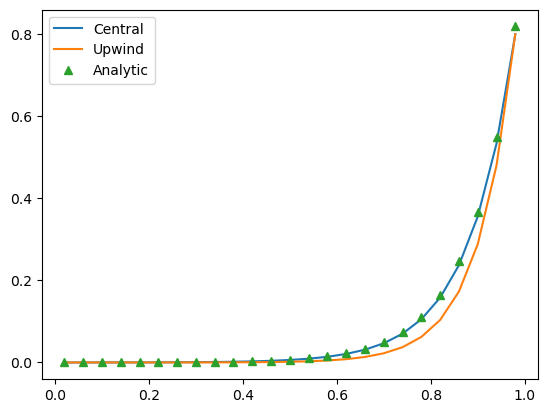

In [12]:
plt.plot(x, c.value, label="Central")
plt.plot(x, c_upwind.value, label="Upwind")
plt.plot(x, c_analytic, '^', label = "Analytic")
plt.legend();